In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.stem import PorterStemmer
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from nltk.tokenize import word_tokenize

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

importing the csv file in jupyter 

In [9]:
df = pd.read_csv(r"C://Users//Dell//Desktop//vaccination_tweets.csv")

In [10]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,08-04-2009 17:52,405,1692,3247,False,20-12-2020 06:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",21-09-2009 15:27,834,666,178,False,13-12-2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",25-06-2020 23:30,10,88,155,False,12-12-2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",10-09-2008 11:28,49165,3933,21853,True,12-12-2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,23-04-2020 17:58,152,580,1473,False,12-12-2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Data Preprocessing

In [11]:
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [17]:
print(text_df['text'].iloc[0],"\n")
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [18]:
def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','',text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [19]:
text_df.text = text_df['text'].apply(data_processing)

In [21]:
text_df.head()

,text
0,folks said daikon paste could treat cytokine s...
1,world wrong side history year hopefully bigges...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts immutable senator even youre ethically s...
4,explain need vaccine borisjohnson matthancock ...


Calculating the polarity of the tweets

In [22]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [24]:
text_df.head(10)

,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


Classification tweets in positve ,negative and neutral

In [25]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [26]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [27]:
text_df.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
1,world wrong side history year hopefully bigges...,-0.5,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.0,Neutral
3,facts immutable senator even youre ethically s...,0.1,Positive
4,explain need vaccine borisjohnson matthancock ...,0.0,Neutral


<Axes: xlabel='sentiment', ylabel='count'>

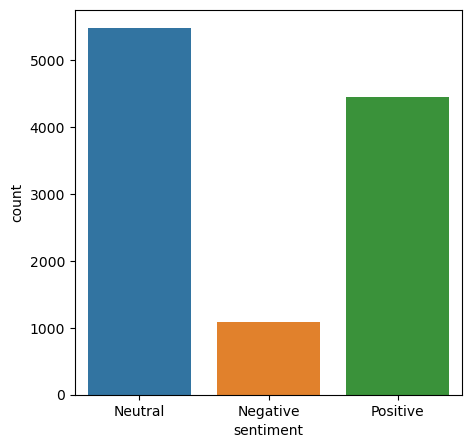

In [28]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)


Text(0.5, 1.0, 'Distribution of sentiments')

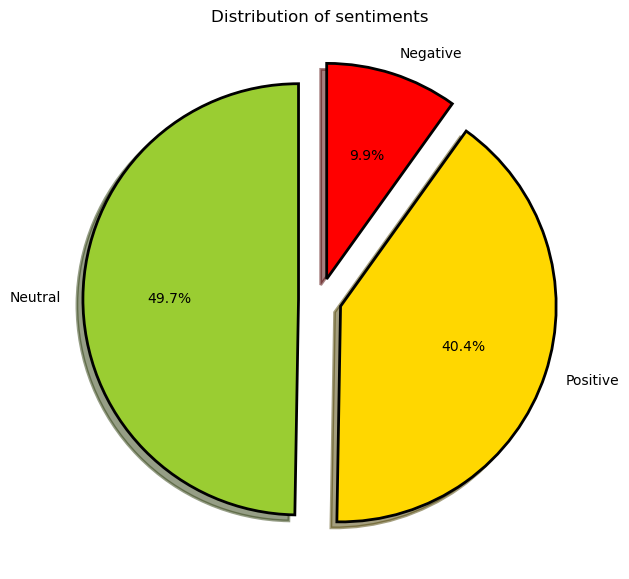

In [29]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

DATA VISUALIZATION OF POSITIVE TWEETS

In [30]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
9216,despite israel pfizerbiontech vaccine consider...,1.0,Positive
7859,excellent news israel pfizerbiontech pfizervac...,1.0,Positive
2308,thankful get covid vaccine today impressed org...,1.0,Positive
5534,syappa mukka done dusted best thing happened m...,1.0,Positive
8719,got vaccine todayy hooray gods timing always p...,1.0,Positive


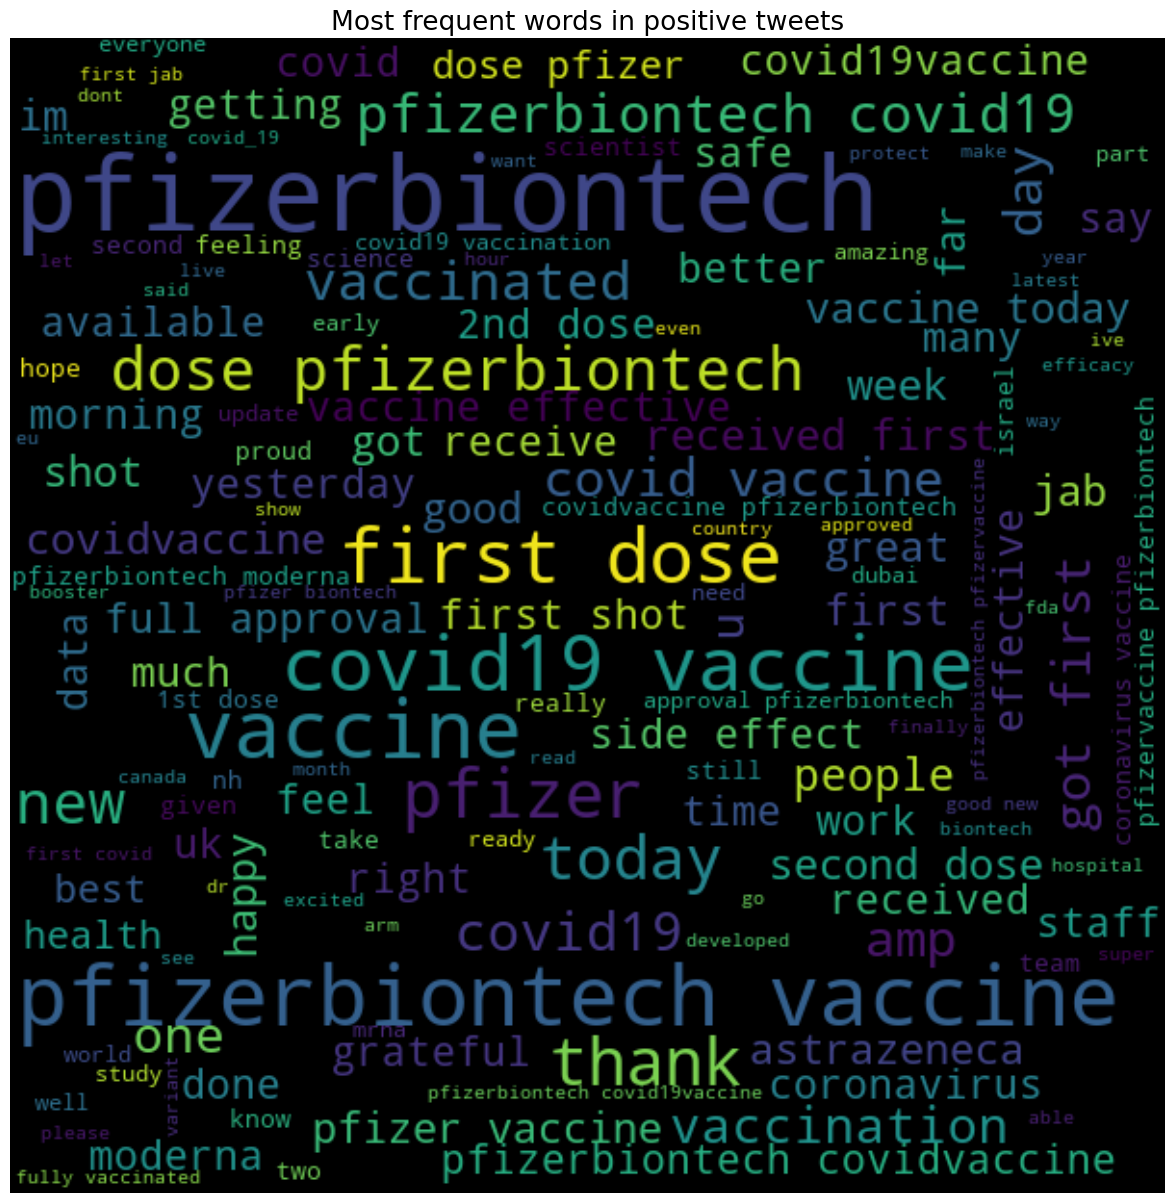

In [23]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=150, width=600, height=600).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

DATA VISUALIZATION OF NEGATIVE TWEETS

In [31]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
2912,work skilled nursing facility got first vaccin...,-0.003333,Negative
7256,200321 752308 vaccinations new daily record da...,-0.003409,Negative
2073,ukgovernment cant even vaccinate properly ethi...,-0.004762,Negative
7715,got first dose less waiting time airport vacci...,-0.005556,Negative
7157,nas_k27 second dose due end next month well fa...,-0.006250,Negative


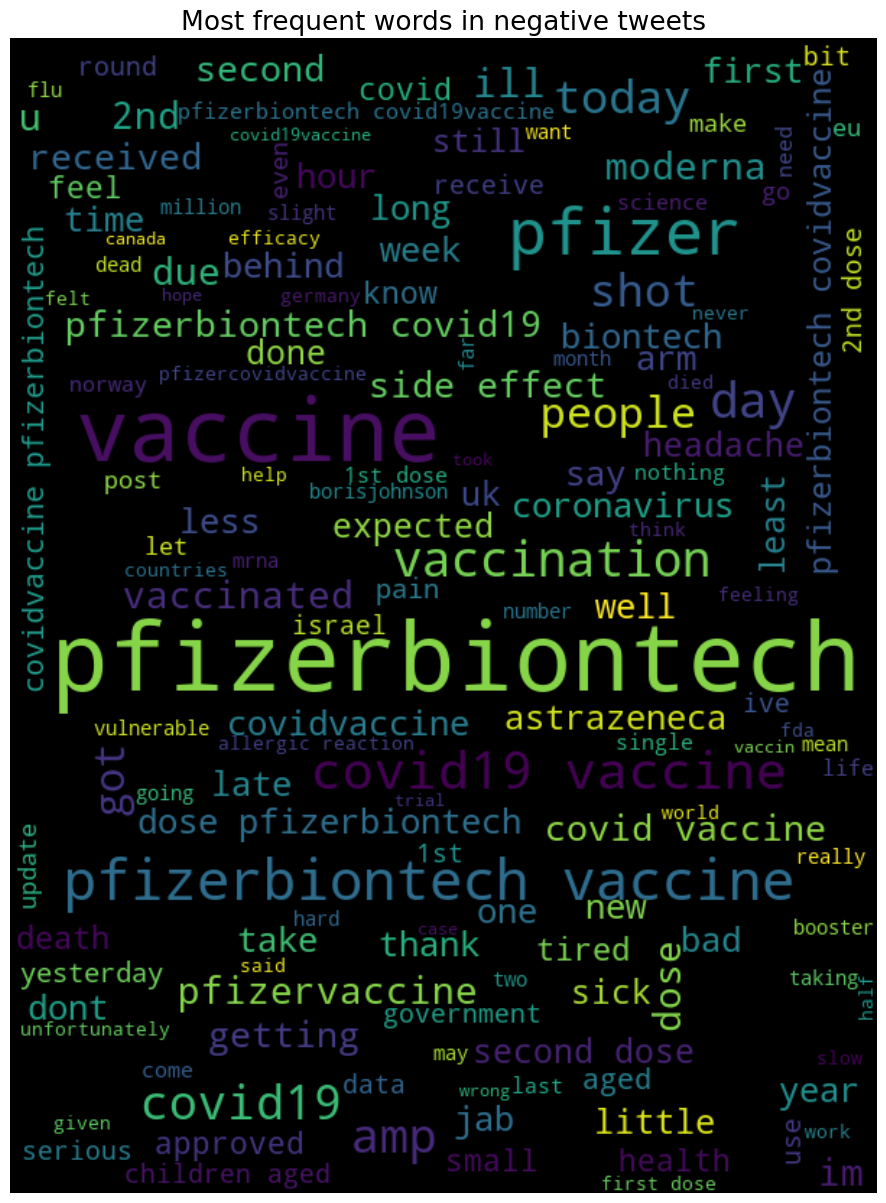

In [32]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=150, width=600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

DATA VISUALIZATION OF NEURAL TWEETS

In [33]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
7539,additional measures discussions potential part...,0.0,Neutral
7558,2nd booster shot pfizerbiontech choosetovaccin...,0.0,Neutral
7557,2nd dose pfizerbiontech covid19vaccination,0.0,Neutral
7555,callmejulius got mine two weeks ago pfizerbion...,0.0,Neutral


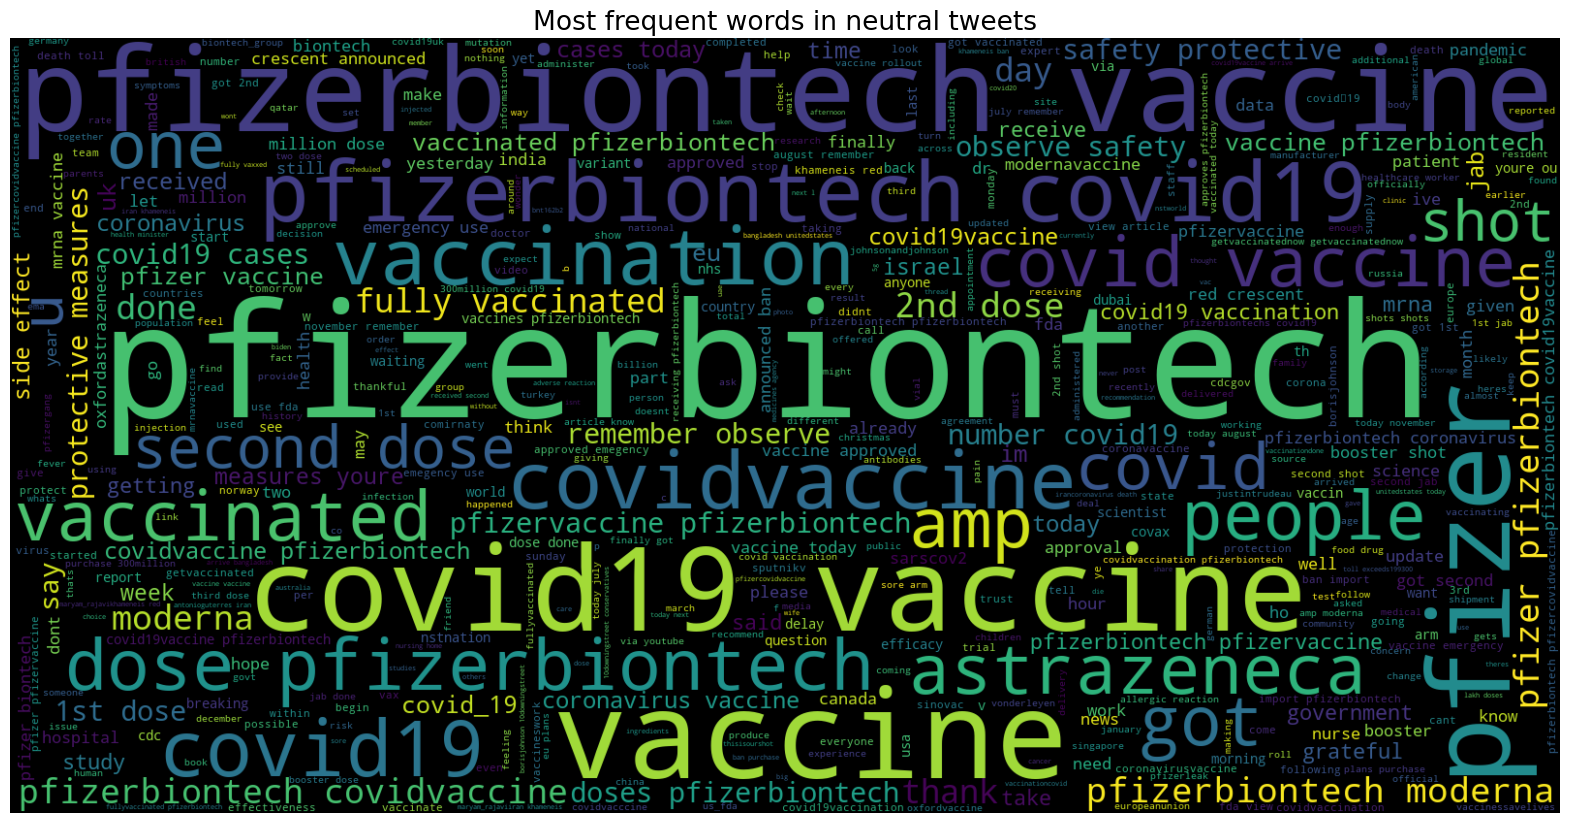

In [34]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [36]:
from sklearn.feature_extraction.text import CountVectorizer


In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

trying to print the feature names generated by count vectorizer

In [38]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))


Number of features: 78583

First 20 features:
 ['000' '000 doses' '000 initial' '000 people' '000 vaccines' '0000001'
 '0000001 covid19' '0011' '0011 abt' '004' '004 covid' '004 israelis' '01'
 '01 getting' '01 june' '01 november' '01aug2021' '01aug2021 doublevaxxed'
 '02' '02 175']


In [39]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)


In [40]:
print(X)

  (0, 15440)	1
  (0, 15505)	1
  (0, 17746)	1
  (0, 17747)	1
  (0, 17795)	1
  (0, 17796)	1
  (0, 27036)	1
  (0, 27046)	1
  (0, 48585)	1
  (0, 48586)	1
  (0, 49897)	1
  (0, 58471)	1
  (0, 58490)	1
  (0, 63943)	1
  (0, 63945)	1
  (0, 68712)	1
  (0, 68715)	1
  (1, 9517)	1
  (1, 9531)	1
  (1, 22696)	1
  (1, 22707)	1
  (1, 24087)	1
  (1, 32197)	1
  (1, 32224)	1
  (1, 32654)	1
  :	:
  (11018, 64946)	1
  (11018, 64947)	1
  (11019, 663)	1
  (11019, 684)	1
  (11019, 1163)	1
  (11019, 1228)	1
  (11019, 11993)	1
  (11019, 12055)	1
  (11019, 15959)	1
  (11019, 16011)	1
  (11019, 41483)	1
  (11019, 46052)	1
  (11019, 46054)	1
  (11019, 46200)	1
  (11019, 46211)	1
  (11019, 46476)	1
  (11019, 46478)	1
  (11019, 54008)	1
  (11019, 54012)	1
  (11019, 56550)	1
  (11019, 56565)	1
  (11019, 58391)	1
  (11019, 58412)	1
  (11019, 67652)	1
  (11019, 67671)	1


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [42]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (8816, 78583)
Size of y_train: (8816,)
Size of x_test: (2204, 78583)
Size of y_test: (2204,)


In [43]:
import warnings
warnings.filterwarnings('ignore')


In [44]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 85.21%


In [45]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[  66  125   27]
 [   1 1077    9]
 [  12  152  735]]


              precision    recall  f1-score   support

    Negative       0.84      0.30      0.44       218
     Neutral       0.80      0.99      0.88      1087
    Positive       0.95      0.82      0.88       899

    accuracy                           0.85      2204
   macro avg       0.86      0.70      0.74      2204
weighted avg       0.86      0.85      0.84      2204



In [47]:
from matplotlib import style
style.use('ggplot')


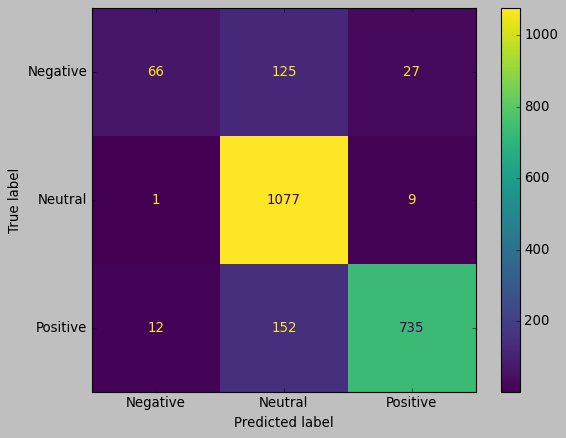

In [63]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()



In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={'C':[0.001
                 , 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [50]:
print("Best parameters:", grid.best_params_)


Best parameters: {'C': 10}


In [51]:
y_pred = grid.predict(x_test)

In [52]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 86.25%


In [53]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

[[  79  114   25]
 [   3 1075    9]
 [  15  137  747]]


              precision    recall  f1-score   support

    Negative       0.81      0.36      0.50       218
     Neutral       0.81      0.99      0.89      1087
    Positive       0.96      0.83      0.89       899

    accuracy                           0.86      2204
   macro avg       0.86      0.73      0.76      2204
weighted avg       0.87      0.86      0.85      2204



In [54]:
from sklearn.svm import LinearSVC

In [55]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [56]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("test accuracy: {:.2f}%".format(svc_acc*100))


test accuracy: 87.70%


In [57]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[  93   98   27]
 [   3 1074   10]
 [  17  116  766]]


              precision    recall  f1-score   support

    Negative       0.82      0.43      0.56       218
     Neutral       0.83      0.99      0.90      1087
    Positive       0.95      0.85      0.90       899

    accuracy                           0.88      2204
   macro avg       0.87      0.76      0.79      2204
weighted avg       0.88      0.88      0.87      2204



In [58]:
grid = {
    'C':[0.01, 0.1, 1, 10],
    'kernel':["linear","poly","rbf","sigmoid"],
    'degree':[1,3,5,7],
    'gamma':[0.01,1]
}
grid = GridSearchCV(SVCmodel, param_grid)
grid.fit(x_train, y_train)


GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [59]:
print("Best parameter:", grid.best_params_)

Best parameter: {'C': 10}


In [60]:
y_pred = grid.predict(x_test)

In [61]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 87.75%


In [62]:
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))


[[  93   99   26]
 [   3 1072   12]
 [  18  112  769]]


              precision    recall  f1-score   support

    Negative       0.82      0.43      0.56       218
     Neutral       0.84      0.99      0.90      1087
    Positive       0.95      0.86      0.90       899

    accuracy                           0.88      2204
   macro avg       0.87      0.76      0.79      2204
weighted avg       0.88      0.88      0.87      2204

